# Heart Disease Prediction

Heart Disease describes a range of conditions that affect the heart which include arrhythmias,congential heart defects etc...By this project we will be able to predict the condition of the person heart in advance.It predicts if the person likely to have a heart disease or not.

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
dataset=pd.read_csv("dataset.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Displaying top 5 rows of the Dataset


We use head method from pandas

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## checking the last 5 rows of the Dataset

We use tail method to print last 5 rows of the dataset

In [4]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Finding Shape of the Dataset

shape method is used to find the actual shape of the dataset

In [5]:
dataset.shape

(303, 14)

Here 303 represents the total number of rows where as 14 represents the total number of columns respectively.

In [6]:
print("Number of Rows",dataset.shape[0])
print("Number of columns",dataset.shape[1])

Number of Rows 303
Number of columns 14


## Getting information about the Dataset

Using info method we fetch the details regarding the dataset which includes with different datatypes,count of null values etc...

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the above output we can conclude that there are only two datatypes present in the dataset int64,float64.In each column,there are no null values i.e; all the columns are not null.

## Checking Null Values in the Dataset

isnull() is the method in pandas  describes if the dataset contains null values or not

In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the above output we can say that there are no null values in the dataset.

## Checking for Duplicate Data and printing them 

After checking the null values we check if they are any duplicates for good accuracy with duplicated() method

In [9]:
dataset_dup=dataset.duplicated().any()
print(dataset_dup)

True


This dataset contain duplicate values.To remove those duplicates we use another method called drop_duplicates() method to make the values of datset unique.

In [10]:
dataset=dataset.drop_duplicates()

After removing the duplicate values,the shape of the dataset as follows

In [11]:
dataset.shape

(302, 14)

## Getting overall Statistics About the Dataset

describe method give the deeper insights about the data.It consists of stastical measures like mean,standard deviation,minimum,maximum etc.of different columns which are present in the dataset.

In [12]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Drawing Correlation Matrix

To visualize patterns in data,correlation matrix is used.It also helps to predict the evolution of the relationship between the variables. 

In [13]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


With the help of seaborn library,we visualize the corelation matrix through a heatmap

<AxesSubplot:>

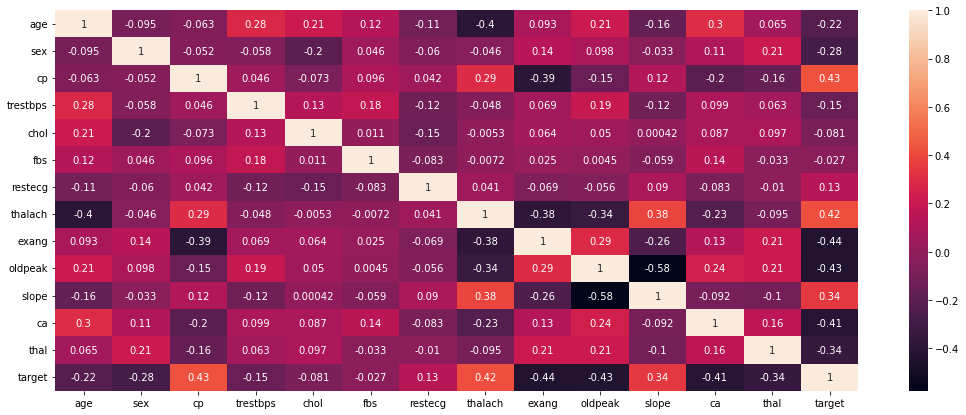

In [14]:
plt.figure(figsize=(18,7))
sns.heatmap(dataset.corr(),annot=True)

## Checking How many people have Heart Disease and How many Don't have the Heart Disease in the Dataset

In [15]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

On the basis of target variable we graphically represent the people with heart disease and people with no heart disease.

In [16]:
dataset["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

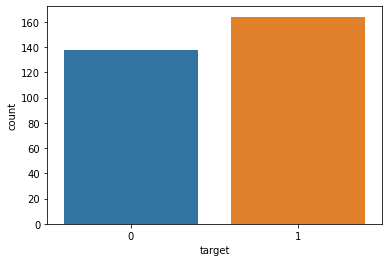

In [17]:
sns.countplot(dataset["target"])

## Finding the count of Male and Female in the Dataset 

Similarly we find the total number of males,females in dataset and represent them graphically.

In [18]:
dataset["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

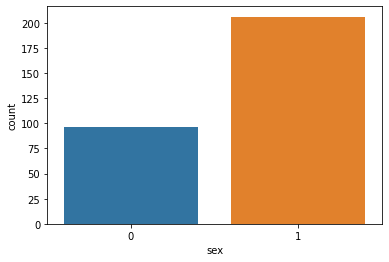

In [19]:
sns.countplot(dataset["sex"])

## Finding Gender Distribution According to the Target Variable 

Now we represent the total number of heart diseased people with respect to gender

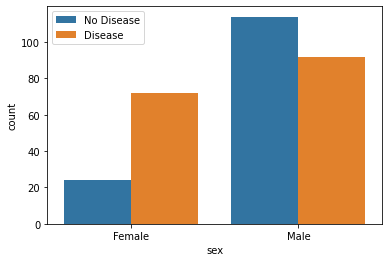

In [20]:
sns.countplot(x="sex",hue="target",data=dataset)
plt.xticks([1,0],["Male","Female"])
plt.legend(labels=["No Disease","Disease"])
plt.show()

From the above plot there are rate of heart disease is low for male when compareed to female its more

## Check Age Distribution in the Dataset 

The following plot describes the age distribution 

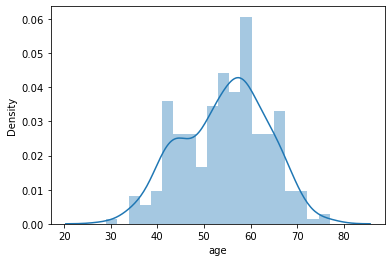

In [21]:
sns.distplot(dataset["age"],bins=20)
plt.show()

## Check Chest Pain Type 

unique method represents the unique values in the dataset 

In [22]:
dataset['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

There are 4 unique values in the dataset as follows:
    0-Typical Angina
    1-Atypical Angina
    2-Non-Anginal pain
    3-Asymptomatic

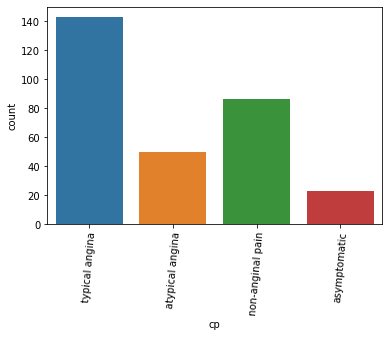

In [23]:
sns.countplot(dataset["cp"])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=85)
plt.show()

## Showing the Chest Pain Distribution as per the Target Variable 

The following plot shows the chest pain(cp) distribution with respect to the target variable

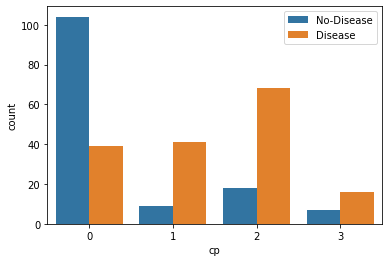

In [24]:
sns.countplot(x="cp",hue="target",data=dataset)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

## Show Fasting Blood Sugar Distribution According to Target Variable

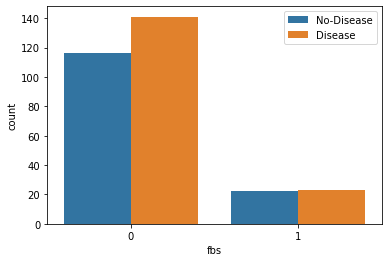

In [25]:
sns.countplot(x="fbs",hue="target",data=dataset)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

## Checking Resting Blood Pressure Distribution

<AxesSubplot:>

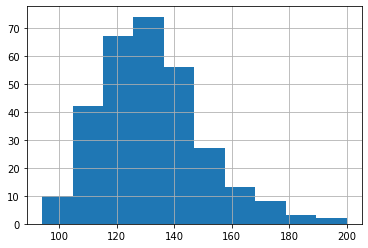

In [26]:
dataset["trestbps"].hist()

## Compare Resting Blood Pressure as per sex Column

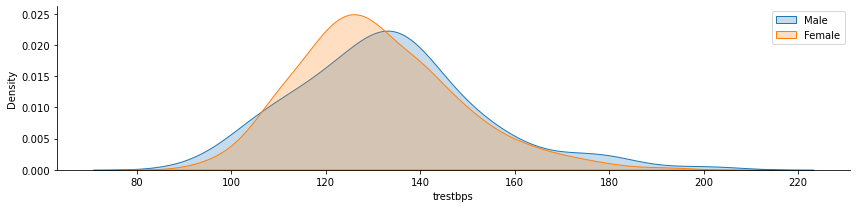

In [27]:
h=sns.FacetGrid(dataset,hue="sex",aspect=4)
h.map(sns.kdeplot,"trestbps",shade="True")
plt.legend(labels=["Male","Female"])

## Show Distribution of Serum Cholesterol

<AxesSubplot:>

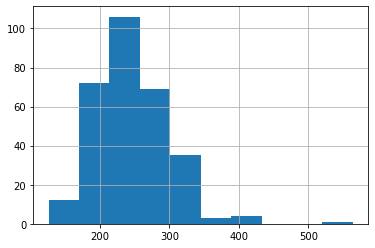

In [28]:
dataset["chol"].hist()

## Plot Continuous Variable

In [29]:
cate_val=[]
cont_val=[]
for column in dataset.columns:
    if dataset[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [30]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [31]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

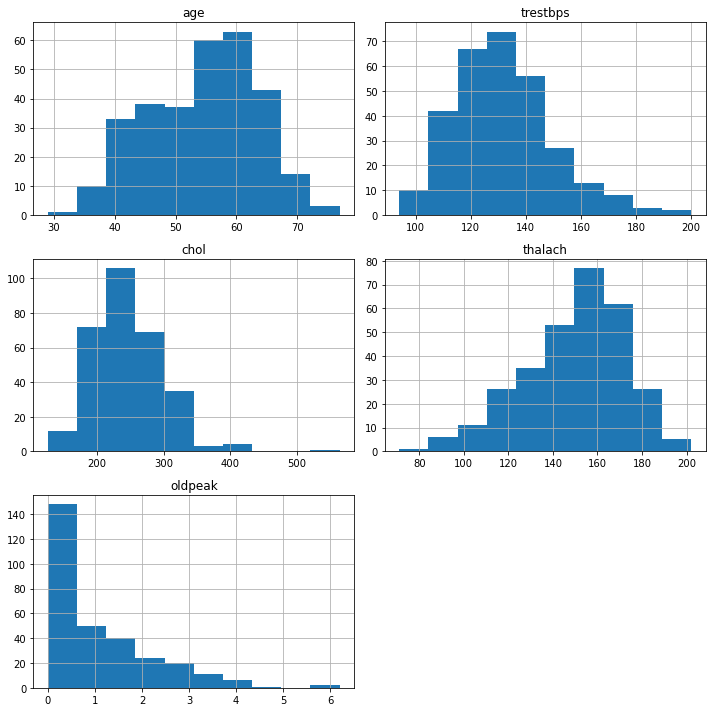

In [32]:
dataset.hist(cont_val,figsize=(10,10))
plt.tight_layout()
plt.show()

## Encoding Categorical Data

To go into deeper insights of the data we encode categorical data

In [33]:
cate_val.remove("sex")
cate_val.remove("target")
data=pd.get_dummies(dataset,columns=cate_val,drop_first=True)

In [34]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


##  Feature Scaling

Scaling of features takes place with the help of Standardscaler to maintain the equality among the data

In [35]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [38]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Splitting The Dataset Into The Training Set And Test Set 

This is the crucial step in the whole project. Here the dataset will be split into 2 parts which are x, y where x represents the dependent variables and y represents the independent variables

In [39]:
X=data.drop("target",axis=1)
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0.478910,-0.106449,-1.161988,-0.727060,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.042904,1,-1.232023,0.338703,-0.768384,0.135360,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,0.285561,1,-0.091401,-2.235438,-1.511859,0.135360,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [40]:
y=data["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
132,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
203,1.503322,1,2.760154,0.532247,0.018826,0.480328,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
197,1.392616,1,-0.376556,0.145158,0.587366,-0.727060,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
75,0.064151,0,0.193755,0.067741,0.499898,0.307844,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
177,1.060500,1,0.478910,1.712868,0.368697,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
71,-0.378671,1,-2.144521,-0.377412,0.193761,-0.899544,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
106,1.614027,1,1.619532,-0.241930,-0.812118,-0.813302,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
271,0.728383,1,0.136724,-0.241930,-0.199843,1.342748,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [44]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
180,0.064151,1,0.022661,2.061248,-0.768384,0.135360,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
229,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
111,0.285561,1,1.049221,-2.332210,1.024705,-0.727060,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
247,1.281911,1,1.619532,-0.009677,-1.293190,-0.899544,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
60,1.835438,0,-1.232023,0.358057,-0.855851,-0.899544,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0.478910,0.996754,-1.205722,2.722620,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
104,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
194,0.617678,1,0.478910,-1.190298,0.237495,1.687716,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [45]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [46]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

## Logistic Regression 

Logistic regression is used for predicting the categorical dependent variable using independent variables. It predicts the output of a categorical dependent variable.It gives the probabilistic output which can be either yes or no (OR) 0 or 1.

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred1=log.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
a=accuracy_score(y_test,y_pred1)
a

0.9016393442622951

## SVC 

SVC stands for Support vector classifier . The main objective of this classifier is to return a "best fit"  that categorizes the data. It is also capable in performing the binary classification  and also multi classification on the dataset

In [52]:
from sklearn import svm

In [53]:
svm=svm.SVC()

In [54]:
svm.fit(X_train,y_train)

SVC()

In [55]:
y_pred2=svm.predict(X_test)

In [56]:
b=accuracy_score(y_test,y_pred2)
b

0.8688524590163934

## KNeighbors Classifier

KNN stands for K nearest neighbour which is used to solve both classification and regression problems.In this particular problem,we use classfier. The main principle behind this classifier is the known data is arranged in a space defined by selected features.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
lmm=KNeighborsClassifier()

In [59]:
lmm.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred3=lmm.predict(X_test)

In [61]:
c=accuracy_score(y_test,y_pred3)
c

0.8688524590163934

Therefore, in order to make use of the KNN algorithm, it's sufficient to create an instance of KNeighborsClassifier . By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We can also change that parameter as follows

In [62]:
score=[]
for k in range(1,40):
    lmm=KNeighborsClassifier(n_neighbors=k)
    lmm.fit(X_train,y_train)
    y_pred=lmm.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [63]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [64]:
lmm=KNeighborsClassifier(n_neighbors=2)
lmm.fit(X_train,y_train)
y_pred=lmm.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

## Non-Linear Machine Learning Algorithms

For Non-linear machine learning algorithms there is no need of performing data preprocessing step and there is no need of separating  the values into categorical and continuous

In [65]:
ds=pd.read_csv("dataset.csv")

In [66]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
ds=ds.drop_duplicates()

In [68]:
ds.shape

(302, 14)

So we directly split the dataset into 2 datasets one is training dataset and the other is testing dataset.

In [69]:
X=data.drop("target",axis=1)
y=data["target"]

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Decision Tree Classifier

Decision tree classifier is a graphical representation of solution to the problem based on given conditions.Here the decision variable is categorical.

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtc=DecisionTreeClassifier()

In [73]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred5=dtc.predict(X_test)

In [75]:
d=accuracy_score(y_test,y_pred5)
d

0.7540983606557377

## Random Forest Classifier 

Random forest is also used in solving classification and regression problems.The main advantage is it can handle both the continuous variables and also the categorical variables . In the case of classification it gives better results.

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc=RandomForestClassifier()

In [78]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred6=rfc.predict(X_test)

In [80]:
e=accuracy_score(y_test,y_pred5)
e

0.7540983606557377

## Gradient Boosting Classifier 

Gradient Boost Classifier is a group of machine learning algorithms that combine many weak learning models and create a strong predictive model which is typically decision trees. It optimizes classification, regression, ranking by learning from weaker models to become a strong model.

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbc=GradientBoostingClassifier()

In [83]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [84]:
y_pred7=gbc.predict(X_test)

In [85]:
f=accuracy_score(y_test,y_pred7)
f

0.7868852459016393

Till now we performed training and testing of different models. The model which is more accurate can be known by the following plot visually. First of all, we create a data frame using a dictionary by adding the name of the algorithm and the accuracy value

In [86]:
dict={"Models":['LR','SVM','KNN','DT','RF','GB'],"Accuracy":[a,b,c,d,e,f]}
df=pd.DataFrame(dict)
df

,Models,Accuracy
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.754098
4,RF,0.754098
5,GB,0.786885


Till now we performed training and testing of different models. The model which is more accurate can be known by the following plot visually. First of all, we create a data frame using a dictionary by adding the name of the algorithm i.e., model and the accuracy value

By using the seaborn library we visually show the graphical representation of the model and the accuracy rate of the model. With the help of this graph, we will identify the  model which gives the best accuracy rate and perform the prediction with that data

In [87]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

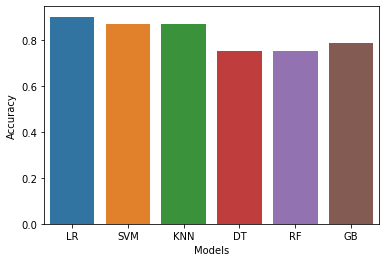

In [88]:
sns.barplot(df["Models"],df["Accuracy"])

From the above graph, we can analyze that the Logistic Regression has the highest accuarcy.

Now we train the model with Logistic Regression and test it.

# Logistic Regression

To perform logistic regression, we split the data into 2 types with 2 variables x, y in which x is the dependent variable and y is the independent variable. They were again classified into 2 types each they are x_train ,y_train ,x_test ,y_test.

In [89]:
X=dataset.drop(columns='target',axis=1)
y=dataset['target']
print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=2)

In [91]:
print(X.shape,X_train.shape,X_test.shape)

(302, 13) (211, 13) (91, 13)


In [92]:
model=LogisticRegression()

In [93]:
model.fit(X_train,y_train)

LogisticRegression()

In [94]:
X_train_pred=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,y_train)

In [95]:
training_data_accuracy

0.8436018957345972

In [96]:
X_test_pred=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_pred,y_test)

In [97]:
testing_data_accuracy

0.8681318681318682

After training the data we check how  the model is  working by giving some values and test the model.

In [98]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
a=np.asarray(input_data)
re=a.reshape(1,-1)
re

array([[ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ]])

In [99]:
p=model.predict(re)
print(p)
if(p[0]==0):
    print("HEART DISEASE:NEGATIVE")
else:
    print("HEART DISEASE:POSITIVE")

[1]
HEART DISEASE:POSITIVE


Finally, the model predicted that the person is likely to have heart disease and should consult a doctor for further medications. In this way, we used different types of models to predict if the person is likely to have heart disease. This model can be improved further by specifying the exact heart disease the patient is suffering from which can also be possible with Multi classification.